# Review: Data Analysis for Titanic

## Preparation

- Download and Install [Anaconda](https://www.continuum.io/downloads) (Python 3 version)
- Run command in a new shell: `jupyter lab`
- If you run jupyter lab in a linux server through ssh, open a new terminal
    - `ssh -L 8000:localhost:(jupyter port, default is 8888) (user)@(server address)`
    - after log in, `jupyter notebook list`, check and copy the token of your jupyter
    - open browser http://localhost:8000/, enter the token
- Create a new notebook: Left-upper area -> "+" (New launcher) -> Notebook -> Python 3

## Contents

1. Load and Format Data
    - Rename
    - Index and Reindex
    - String Operations in Series
2. Summary Tables
3. Bivariate Association
4. Data Cleaning
5. Machine Learning: Classification
    - ROC and AUC
    - Logistic Regression
    - Tree-based Methods
    - Variable Selection

## Review (1.1): Load Data

In [1]:
# Load modules and set options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision = 3)
pd.set_option('precision', 3)
%matplotlib notebook
%cd ~/Stat

/Users/fangda/Stat


In [2]:
np.set_printoptions(threshold = 100)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 15)

In [3]:
# Load data
da = pd.read_csv("Titanic.csv")
da.shape

(891, 12)

In [4]:
da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


## Review (1.2): Format Data: Rename

In [5]:
# DT.rename(index, columns): use a dict or lambda function to change row/column names
da.rename(columns = {"PassengerId": "Id"}).head(2)

,Id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C


In [6]:
da.rename(index = lambda x: x+10000).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10000,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
10001,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C


In [7]:
# DT.replace(to_replace, value): replace values in data
da.replace({"Sex": {"male": 1, "female": 0}}).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",1,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",0,38.0,1,0,PC 17599,71.283,C85,C


## Review (1.3): Format Data: Set and Reset Index

In [8]:
da = da.set_index("PassengerId")
da.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C


In [9]:
da.reset_index().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.283,C85,C


## Review (1.4): Format Data: Strings in Series

In [10]:
# Select a string column
s = da["Cabin"]
s

PassengerId
1       NaN
2       C85
       ... 
890    C148
891     NaN
Name: Cabin, dtype: object

In [11]:
pd.value_counts(s)

C23 C25 C27    4
B96 B98        4
              ..
E68            1
B80            1
Name: Cabin, dtype: int64

In [12]:
# Use string operations in Series with S.str
s.str[0]

PassengerId
1      NaN
2        C
      ... 
890      C
891    NaN
Name: Cabin, dtype: object

## Review (1.5) Format Data: Strings in Series

In [13]:
# s.str.split(pat, n, expand): split string in Series with pattern
s_split = s.str.split(" ", expand = True)
s_split

,0,1,2,3
PassengerId,,,,
1,NaN,None,None,None
2,C85,None,None,None
...,...,...,...,...
890,C148,None,None,None
891,NaN,None,None,None


In [14]:
# We can use regular expression as well
s_split[0].str.extract('([a-zA-Z]+)(\d+)', expand=True)

,0,1
PassengerId,,
1,NaN,NaN
2,C,85
...,...,...
890,C,148
891,NaN,NaN


## Review (2.1): Summary Tables

In [15]:
# pd.concat(objs, axis, keys): concat multiple Series/DataFrames
pd.concat([da.dtypes, da.notnull().sum()], axis = 1, keys = ["Type", "N"])

,Type,N
Survived,int64,891
Pclass,int64,891
...,...,...
Cabin,object,204
Embarked,object,889


In [16]:
# DT.describe(percentile): mainly for numeric data
da.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,714.000,891.000,891.000,891.000
mean,0.384,2.309,29.699,0.523,0.382,32.204
...,...,...,...,...,...,...
75%,1.000,3.000,38.000,1.000,0.000,31.000
max,1.000,3.000,80.000,8.000,6.000,512.329


## Review (2.2): Summary Tables for Frequency

In [17]:
# DT.apply(func, axis): apply axis-wise function for each row/column
# pd.value_counts(values, sort, ascending): count values in a Series/list
da.apply(lambda x: pd.Series(pd.value_counts(x).index[:3]))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Brown, Mrs....",male,24.0,0,0,CA. 2343,8.050,C23 C25 C27,S
1,1.0,1,"Gronnestad,...",female,22.0,1,1,347082,13.000,B96 B98,C
2,NaN,2,"Ali, Mr. Ahmed",NaN,18.0,2,2,1601,7.896,G6,Q


In [18]:
da.apply(lambda x: pd.Series(pd.value_counts(x).values[:3]))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,549.0,491,1,577.0,30,608,678,7,43,4,644
1,342.0,216,1,314.0,27,209,118,7,42,4,168
2,NaN,184,1,NaN,26,28,80,7,38,4,77


## Review (2.3): Integrated Summary Table

In [19]:
# DT.rename(index, column): rename the index and column
def summary(da):
    op = pd.concat([da.dtypes.rename("Type"), 
                    da.notnull().sum().rename("N"),
                    da.describe().drop("count").T, 
                    da.apply(lambda x: pd.Series(pd.value_counts(x).index[:5])).rename(lambda x: "FreqCat{}".format(x+1)).T, 
                    da.apply(lambda x: pd.Series(pd.value_counts(x).values[:5])).rename(lambda x: "FreqVal{}".format(x+1)).T], 
                   axis = 1)
    return(op)
summary(da)

,Type,N,mean,std,min,25%,50%,75%,max,FreqCat1,FreqCat2,FreqCat3,FreqCat4,FreqCat5,FreqVal1,FreqVal2,FreqVal3,FreqVal4,FreqVal5
Age,float64,714,29.699,14.526,0.42,20.125,28.0,38.0,80.0,24,22,18,19,30,30.0,27.0,26.0,25.0,25.0
Cabin,object,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C23 C25 C27,B96 B98,G6,D,F33,4.0,4.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Survived,int64,891,0.384,0.487,0.00,0.000,0.0,1.0,1.0,0,1,NaN,NaN,NaN,549.0,342.0,NaN,NaN,NaN
Ticket,object,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,347082,1601,347088,CA 2144,7.0,7.0,7.0,6.0,6.0


## Review (2.4): Groupby and MultiIndex

In [20]:
# DT.groupby(by).apply(func): apply a function on each row groups
da_groupsum = da.groupby(["Survived", "Sex"]).apply(summary)
da_groupsum

Type    N    mean     std  min    25%   50%  \
Survived Sex                                                               
0        female Age       float64   64  25.047  13.619  2.0  16.75  24.5   
                Cabin      object    6     NaN     NaN  NaN    NaN   NaN   
...                           ...  ...     ...     ...  ...    ...   ...   
1        male   Survived    int64  109   1.000   0.000  1.0   1.00   1.0   
                Ticket     object  109     NaN     NaN  NaN    NaN   NaN   

                            75%   max FreqCat1 FreqCat2 FreqCat3  FreqCat4  \
Survived Sex                                                                 
0        female Age       33.25  57.0       18        9        2        45   
                Cabin       NaN   NaN  C22 C26       G6      C49       E77   
...                         ...   ...      ...      ...      ...       ...   
1        male   Survived   1.00   1.0        1      NaN      NaN       NaN   
                Ticket      NaN   NaN     1601   113760   230080  PC 17572   

                         FreqCat5  FreqVal1  FreqVal2  FreqVal3  FreqVal4  \
Survived Sex                                                                
0        female Age            25       5.0       4.0       4.0       3.0   
                Cabin         NaN       2.0       2.0       1.0       1.0   
...                           ...       ...       ...       ...       ...   
1        male   Survived      NaN     109.0       NaN       NaN       NaN   
                Ticket       2661       5.0       2.0       2.0       2.0   

                          FreqVal5  
Survived Sex                        
0        female Age            3.0  
                Cabin          NaN  
...                            ...  
1        male   Survived       NaN  
                Ticket         2.0  

[44 rows x 19 columns]

In [21]:
# MultiIndex: use DT.loc[] and tuple to select subset
da_groupsum.loc[(1, "male", 'Age')]

Type        float64
N                93
             ...   
FreqVal4          4
FreqVal5          4
Name: (1, male, Age), dtype: object

## Review (3.1): Bivariate Association: Num-Num

In [22]:
da.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549
...,...,...,...,...,...,...
Parch,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.257,-0.549,0.096,0.160,0.216,1.000


<IPython.core.display.Javascript object>


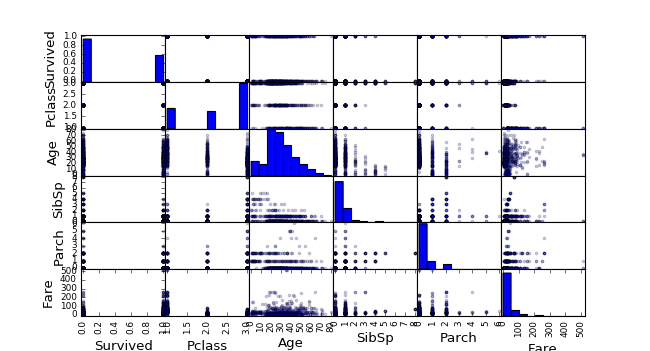

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f2d39e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120354f98>]], dtype=object)

In [23]:
pd.tools.plotting.scatter_matrix(da, alpha = 0.2, hist_kwds = {"bins": 10})

## Review (3.2): Bivariate Association: Num-Cat

In [24]:
da.groupby(["Survived"]).describe()

Age     Fare   Parch   Pclass    SibSp
Survived                                                  
0        count  424.000  549.000  549.00  549.000  549.000
         mean    30.626   22.118    0.33    2.532    0.554
...                 ...      ...     ...      ...      ...
1        75%     36.000   57.000    1.00    3.000    1.000
         max     80.000  512.329    5.00    3.000    4.000

[16 rows x 5 columns]

<IPython.core.display.Javascript object>


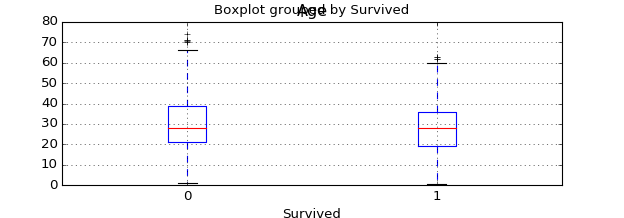

In [25]:
da.boxplot(column = "Age", by = "Survived")

## Review (3.3): Bivariate Association: Cat-Cat

In [26]:
s = da.groupby(["Survived", "Sex"])["Survived"].count()
s

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [27]:
# S.unstack/DT.stack: convert index between rows and columns
s.unstack("Sex")

Sex,female,male
Survived,,
0,81,468
1,233,109


<IPython.core.display.Javascript object>


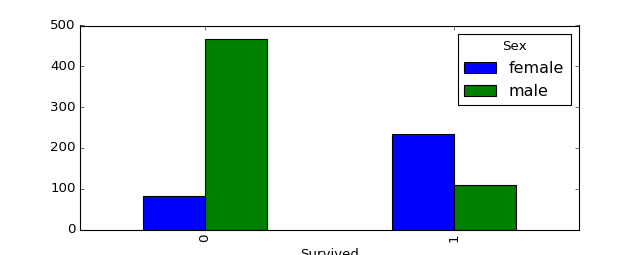

In [28]:
s.unstack("Sex").plot(kind = "bar")

## Review (4.1): Data Cleaning

- An ideal dataset for machine learning: all $X$ variables are numeric, complete and well distributed
- But in reality:
    - Category variables: X = (a, b, c, d)
    - Missing values: X = (1, NA, 3, NA)
    - Biased distribution: X = (1, 2, 3, 10000)
    - Identical (sparse) distribution: X = (2, 2, 2, 2)
    - Collinearity: X1 = (1, 2, 3, 4), X2 = (2, 4, 6, 8)
- We need a general procedure to deal with these problems in data

In [27]:
# Separate X and Y
Y, X = da['Survived'], da.drop('Survived', axis = 1)
Y.shape, X.shape

((891,), (891, 10))

In [28]:
# Separate numeric and categorical part of X
X_num = X.select_dtypes(["number"])
X_cat = X.select_dtypes(["object"])
X_num.shape, X_cat.shape

((891, 5), (891, 5))

## Review (4.2): Data Cleaning for Categorical

In [29]:
# In case of creating too many dummy categories, deal with sparsity first
def sparse_cat(s, sp = 0.01):
    sfreq = pd.value_counts(s) > sp*s.shape[0]
    op = s.where(s.isin(sfreq.index[sfreq]), "others")
    return(op)
X_cat1 = X_cat.apply(sparse_cat)
X_cat1.head(2)

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,others,male,others,others,S
2,others,female,others,others,C


In [30]:
X_cat2 = pd.get_dummies(X_cat1)
X_cat2.head(2)

,Name_others,Sex_female,Sex_male,Ticket_others,Cabin_others,Embarked_C,Embarked_Q,Embarked_S,Embarked_others
PassengerId,,,,,,,,,
1,1,0,1,1,1,0,0,1,0
2,1,1,0,1,1,1,0,0,0


## Review (4.3): Data Cleaning for Numeric

In [31]:
# Scale all numeric variable to mean 0 and std 1, fill missing value with mean 0
X_num1 = ((X_num - X_num.mean())/X_num.std()).fillna(0)
print(X_num1.head(2))

             Pclass    Age  SibSp  Parch   Fare
PassengerId                                    
1             0.827 -0.530  0.433 -0.473 -0.502
2            -1.565  0.571  0.433 -0.473  0.786


In [32]:
# Concat numeric and transformed categorical variables together
X1 = pd.concat([X_num1, X_cat2], axis = 1)
X1.shape

(891, 14)

In [33]:
# Check and delete sparse variables which have over 99% identical or NA values
sparse = lambda x: 1-(pd.value_counts(x).iloc[0] + x.isnull().sum())/x.shape[0]
sp = X1.apply(sparse)
sp

Pclass             0.449
Age                0.801
                   ...  
Embarked_S         0.277
Embarked_others    0.002
dtype: float64

In [34]:
X2 = X1.loc[:, sp > 0.01]
X2.shape

(891, 10)

## Review (4.4): Data Cleaning for Collinearity

In [35]:
# Find collinearity based on lower half correlation matrix
abscor = np.abs(np.tril(np.corrcoef(X2, rowvar = 0), -1))
abscor

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.331,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.083,  0.233,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.018,  0.179,  0.415,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.549,  0.092,  0.16 ,  0.216,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.132,  0.084,  0.115,  0.245,  0.182,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.132,  0.084,  0.115,  0.245,  0.182,  1.   ,  0.   ,  0.   ,
         0.   ,  0.   ],
       [ 0.243,  0.032,  0.06 ,  0.011,  0.269,  0.083,  0.083,  0.   ,
         0.   ,  0.   ],
       [ 0.221,  0.014,  0.026,  0.081,  0.117,  0.074,  0.074,  0.148,
         0.   ,  0.   ],
       [ 0.082,  0.027,  0.071,  0.063,  0.167,  0.126,  0.126,  0.778,
         0.497,  0.   ]])

In [36]:
# Delete variables with any |correlation| > 0.9)
X3 = X2.loc[:, np.all(abscor < 0.9, axis = 1)]
X3.shape

(891, 9)

## Review (4.5): Integrated Data Cleaning

In [37]:
def CleanData(da, sp = 0.01, cor = 0.9, fnorm = lambda x: ((x - x.mean())/x.std()).fillna(0)):
    X_num = da.select_dtypes(["number"])
    X_cat = da.select_dtypes(["object"])
    if(X_num.shape[1] > 0):
        X_num = fnorm(X_num)
    if(X_cat.shape[1] > 0):
        X_cat = pd.get_dummies(X_cat.apply(sparse_cat, sp = sp))
    X = pd.concat([X_num, X_cat], axis = 1)
    if(sp > 0):
        X = X.loc[:, X.apply(sparse) > sp]
    if(cor < 1):
        abscor = np.abs(np.tril(np.corrcoef(X, rowvar = 0), -1))
        X = X.loc[:, np.all(abscor < cor, axis = 1)]
    return(X)

In [38]:
X = CleanData(da.drop("Survived", axis = 1))
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0.827,-0.530,0.433,-0.473,-0.502,0,0,0,1
2,-1.565,0.571,0.433,-0.473,0.786,1,1,0,0
...,...,...,...,...,...,...,...,...,...
890,-1.565,-0.255,-0.474,-0.473,-0.044,0,1,0,0
891,0.827,0.158,-0.474,-0.473,-0.492,0,0,1,0


## Review (5.1): Machine Learning: Classification

- Given data $(X, Y)$ with binary outcome $y_i = 0,1$ for $i = 1,\cdots,n$
- Distance between continuous $\hat{Y} = E(Y) = f(X,\theta)$ and binary $Y$:
    - Continuous Measurement: 
        - Log loss ($-\log(f(Y|\hat{Y})$): $L(Y, \hat{Y}) = -\sum_{i=1}^n\left(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right)$
    - Binarize $\hat{Y}$ based on a threshold $\hat{Y}^{(c)} = 1(\hat{Y} > c)$
        - Misclassification error: $L(Y, \hat{Y}) = \sum_{i=1}^n1(y_i \neq \hat{y}_i^{(c)})$
        - 4 kinds of classification outcome: True Positive, True Negative, False Positive, False Negative

In [39]:
import sklearn.metrics as met
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
yhat = np.array([0.1, 0.3, 0.4, 0.6, 0.2, 0.5, 0.7, 0.8, 0.9, 1])
pd.DataFrame(met.confusion_matrix(y, yhat > 0.5), index = ["y0", "y1"], columns = ["yhat0", "yhat1"])

,yhat0,yhat1
y0,3,1
y1,2,4


## Review (5.2): Machine Learning: ROC and AUC
- True Positive Rate (Sensitivity): $TPR^{(c)} = 1-FNR^{(c)} = \frac{\sum_{i=1}^n1(\hat{y}_i^{(c)} = y_i = 1)}{\sum_{i=1}^n1(y_i = 1)}$
- True Negative Rate (Specificity): $TNR^{(c)} = 1-FPR^{(c)} = \frac{\sum_{i=1}^n1(\hat{y}_i^{(c)} = y_i = 0)}{\sum_{i=1}^n1(y_i = 0)}$
- Receiver operating characteristic (ROC): curve of $(1 - TNR^{(c)}, TPR^{(c)})$
- Area Under Curve (AUC): between 0 (totally false) and 1 (totally true), usually greater than 0.5 (totally random)

<IPython.core.display.Javascript object>


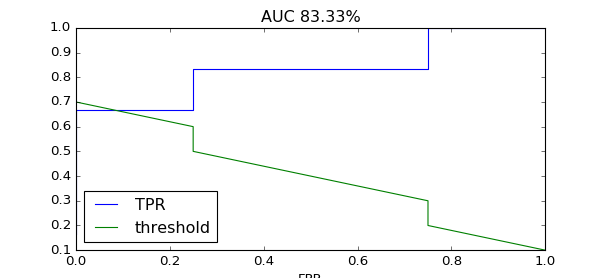

In [40]:
def ROC(Y, Yhat):
    roc = met.roc_curve(Y, Yhat)
    pd.DataFrame({"FPR": roc[0], "TPR": roc[1], "threshold": roc[2]}).set_index(
        "FPR").plot(title = "AUC {:.2%}".format(met.auc(roc[0], roc[1])))
ROC(y, yhat)

## Review (5.3): CV Model Functions

- Use defined machine learning functions last class, revising for classification

In [41]:
def Kfolds(x, k = 5, seed = 1):
    np.random.seed(seed)
    op = np.array_split(np.random.permutation(x), k)
    return(op)
ir_cv = Kfolds(Y.index)
[i.shape for i in ir_cv]

[(179,), (178,), (178,), (178,), (178,)]

In [42]:
def cv_train_class(X, Y, ir_cv, fmodel, fscore = met.roc_auc_score, **kwargs):
    modelL, losstL, lossvL = [], [], []
    for ir_v in ir_cv:
        ir_t = np.setdiff1d(np.hstack(ir_cv), ir_v)
        Xt, Xv, Yt, Yv = X.loc[ir_t], X.loc[ir_v], Y.loc[ir_t], Y.loc[ir_v]
        # Train a scikit-learn model
        model = fmodel(**kwargs)
        model.fit(Xt, Yt)
        # predict and get training-validation loss
        Ythat = model.predict_proba(Xt)[:,1]
        losst = fscore(Yt.values, Ythat)
        Yvhat = model.predict_proba(Xv)[:,1]
        lossv = fscore(Yv.values, Yvhat)
        # save model and training-validation loss
        modelL.append(model)
        losstL.append(losst)
        lossvL.append(lossv)
    op = {"modelL": modelL, 
          "loss": pd.DataFrame({"loss_train": losstL, "loss_val": lossvL})}
    return(op)

## Review (5.4): Logistic Regression
- GLM: $\hat{Y} = g^{-1}(X\beta)$ with link function $g(\cdot)$
- Logistic Regression: link binary $Y$ and linear $X\beta$ using logit function $g^{-1}(X\beta) = \frac{1}{1+\exp(-X\beta)}$
- Maximum likelihood estimator $\hat{\beta}$: minimize log loss $L(Y, \hat{Y}) = -\sum_{i=1}^n\left(y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right)$
- Regularization with penalty: $\hat{\beta} = \arg\min_{\beta}\left(L(Y, \hat{Y}) + \lambda P(\beta)\right)$
    - Ridge (L2 dist): $P(\beta) = \sum_{i=1}^p\beta_i^2$
    - Lasso (L1 dist): $P(\beta) = \sum_{i=1}^p|\beta_i|$

In [43]:
# Default in scikit-learn, logistic regression use L2 penalty and inverse penalty coefficient C (= 1/lambda) = 1
import sklearn.linear_model as lm
md_lg = cv_train_class(X, Y, ir_cv, lm.LogisticRegression)
md_lg["loss"].mean()

loss_train    0.858
loss_val      0.855
dtype: float64

In [44]:
# With L1 penalty function and inverse penalty coefficient C = 10
md_lgl1 = cv_train_class(X, Y, ir_cv, lm.LogisticRegression, penalty='l1', C = 10)
md_lgl1["loss"].mean()

loss_train    0.858
loss_val      0.856
dtype: float64

## Review (5.5): Prediction and ROC Curve

In [45]:
# model.predict(X): Binarized prediction outcome
md_lg["modelL"][0].predict(X.loc[ir_cv[0]])

array([1, 0, 1, ..., 0, 0, 1])

In [46]:
# model.predict_proba(X): Probability prediction of column [Class 0, Class 1]
yvhat0 = md_lg["modelL"][0].predict_proba(X.loc[ir_cv[0]])[:,1]
yvhat0

array([ 0.864,  0.084,  0.868, ...,  0.135,  0.181,  0.722])

<IPython.core.display.Javascript object>


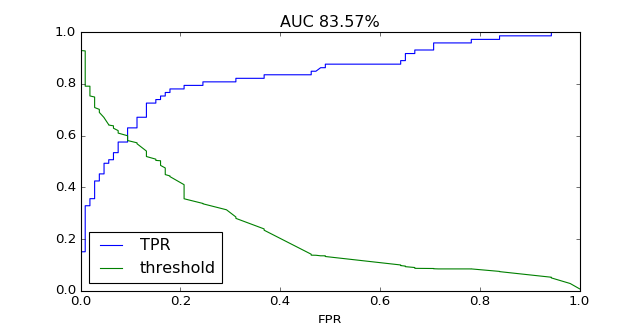

In [49]:
ROC(Y.loc[ir_cv[0]], yvhat0)

## Review (5.6): Tree-based Methods

In [47]:
import sklearn.tree as tree
md_tree = cv_train_class(X, Y, ir_cv, tree.DecisionTreeClassifier, max_depth = 3)
md_tree["loss"].mean()

loss_train    0.867
loss_val      0.851
dtype: float64

In [48]:
import sklearn.ensemble as ensm
md_rf = cv_train_class(X, Y, ir_cv, ensm.RandomForestClassifier, n_estimators = 20, max_depth = 5)
md_rf["loss"].mean()

loss_train    0.913
loss_val      0.868
dtype: float64

In [49]:
md_gbt = cv_train_class(X, Y, ir_cv, ensm.GradientBoostingClassifier, n_estimators = 20, learning_rate = 0.1)
md_gbt["loss"].mean()

loss_train    0.901
loss_val      0.867
dtype: float64

## Review (5.7): Variable Selection in Tree-based Models

In [50]:
wL = pd.concat([pd.Series(model.feature_importances_, index = X.columns) 
                  for model in md_rf["modelL"]], axis = 1)
wL

,0,1,2,3,4
Pclass,0.151,0.131,0.155,0.146,0.127
Age,0.115,0.100,0.102,0.119,0.088
...,...,...,...,...,...
Embarked_Q,0.011,0.013,0.004,0.001,0.010
Embarked_S,0.029,0.021,0.014,0.018,0.026


In [51]:
(wL/wL.mean()).T.describe().T.sort_values("mean", ascending = False)

,count,mean,std,min,25%,50%,75%,max
Sex_female,5.0,4.181,0.170,3.989,4.062,4.202,4.220,4.431
Fare,5.0,1.490,0.181,1.335,1.359,1.441,1.534,1.783
...,...,...,...,...,...,...,...,...
Embarked_C,5.0,0.107,0.010,0.100,0.101,0.105,0.107,0.123
Embarked_Q,5.0,0.072,0.044,0.012,0.039,0.091,0.098,0.118


## Final Project

- Register, download datasets and raise a prediction result on [Kaggle Titanic](https://www.kaggle.com/c/titanic)
- Try to improve your result by improving your data cleaning and machine learning procedures
    - String operations in variables
    - Variable Selection
    - More models ([XGBoost](https://github.com/dmlc/xgboost), Neural Network ([Keras](https://github.com/fchollet/keras)), etc)
    - Hyperparameter optimization in models
    - Be careful about over-fitting
- Wait for your final score after Dec 31